In [1]:
import os
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:

def read_data_from_files(root_folder):
    # 定义需要提取的字段映射
    field_mapping = {
        'GROWTH_DAY': '日龄',
        'HISTORY_TIME': '时间',
        'TARGET_TEMP': '目标温度',
        'HOUSE_TEMP_MIN': '鸡舍温度-最低',
        'HOUSE_TEMP_AVG': '鸡舍温度-平均',
        'HOUSE_TEMP_MAX': '鸡舍温度-最高',
        'TEMP_1_AVG': '温度1-平均',
        'TEMP_2_AVG': '温度2-平均',
        'TEMP_3_AVG': '温度3-平均',
        'TEMP_4_AVG': '温度4-平均',
        'TEMP_5_AVG': '温度5-平均',
        'TEMP_6_AVG': '温度6-平均',
        'OUTSIDE_AVG': '外部-平均',
        'HUMIDITY_IN_1_AVG': 'Humidity In 1 Avg',
        'HUMIDITY_OUT_AVG': '湿度-外部-平均',
        'WATER_CON': '水',
        'FEED_CON': '饲料',
        'LEVEL': '水平'
    }

    # 定义最终需要的字段
    final_fields = [
        '日龄', '时间', '目标温度', '鸡舍温度-最低', '鸡舍温度-平均',
        '鸡舍温度-最高', '温度1-平均', '温度2-平均', '温度3-平均',
        '温度4-平均', '温度5-平均', '温度6-平均', '外部-平均',
        'Humidity In 1 Avg', '湿度-外部-平均', '水', '饲料', '水平',
        'id_no', 'house_no'
    ]

    # 用于存储所有符合条件的数据
    all_data = []

    # 遍历最外层文件夹
    # root_folder = 'your_folder_path'  # 请替换为实际的文件夹路径
    for farm_folder in os.listdir(root_folder):
        if farm_folder.startswith('G'):
            farm_path = os.path.join(root_folder, farm_folder)
            id_no = farm_folder

            # 处理包含xls文件的情况
            for file in os.listdir(farm_path):
                if file.endswith('.xls') and 'H' in file:
                    file_path = os.path.join(farm_path, file)
                    # 提取鸡舍名称
                    house_no = os.path.splitext(file)[0].split('H')[-1]
                    house_no = 'H' + house_no
                    df = pd.read_excel(file_path)
                    df['id_no'] = id_no
                    df['house_no'] = house_no
                    all_data.append(df)


            # 处理包含“EXCEL_Files”文件夹的情况
            excel_files_folder = os.path.join(farm_path, 'EXCEL_Files')
            if os.path.exists(excel_files_folder):
                for file in os.listdir(excel_files_folder):
                    if file.endswith('.xlsx') and file.startswith('H'):
                        file_path = os.path.join(excel_files_folder, file)
                        # 提取鸡舍名称
                        house_no = file.split('-')[0]
                        # 读取指定工作表中的数据
                        df = pd.read_excel(file_path, sheet_name='History View')
                        # 重命名列
                        df = df.rename(columns=field_mapping)
                        df['id_no'] = id_no
                        df['house_no'] = house_no
                        all_data.append(df)

    # 合并所有数据
    if all_data:
        merged_df = pd.concat(all_data, ignore_index=True)
        # 确保最终的 DataFrame 包含所有需要的字段
        merged_df = merged_df.reindex(columns=final_fields)
        # # 保存合并后的数据到一个新的 Excel 文件
        # merged_df.to_excel('merged_result.xlsx', index=False)
        # print('数据合并完成，结果已保存到 merged_result.xlsx')
    else:
        print('未找到符合条件的数据')
    
    return merged_df

In [3]:
root_folder='c:\\FILES_202305\\202504养鸡项目\\chickenfarming\\data\\24.12 2\\环控数据'
merge_df1=read_data_from_files(root_folder)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but 

In [4]:
root_folder='c:\\FILES_202305\\202504养鸡项目\\chickenfarming\\data\\25.01\\环控数据'
merge_df2=read_data_from_files(root_folder)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but 

In [5]:
root_folder='c:\\FILES_202305\\202504养鸡项目\\chickenfarming\\data\\25.02\\环控数据-2502\\环控数据-2502'
merge_df3=read_data_from_files(root_folder)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but 

In [6]:
root_folder='c:\\FILES_202305\\202504养鸡项目\\chickenfarming\\data\\25.03\\2503-环控'
merge_df4=read_data_from_files(root_folder)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but 

In [7]:
all_HumTem_data=pd.concat([merge_df1,merge_df2,merge_df3,merge_df4])
all_HumTem_data=all_HumTem_data.reset_index(drop=True)

In [8]:
all_HumTem_data['house_no']=all_HumTem_data['house_no'].map(lambda x:re.sub(r'[\u4e00-\u9fa5]', '', x))
all_HumTem_data['house_no']=all_HumTem_data['house_no'].map(lambda x :x.split('-')[0])
all_HumTem_data['id_no']=all_HumTem_data['id_no'].str[1:]
all_HumTem_data['id_no']=all_HumTem_data['id_no'].str.replace('-','_')

In [9]:
all_HumTem_data

,日龄,时间,目标温度,鸡舍温度-最低,鸡舍温度-平均,鸡舍温度-最高,温度1-平均,温度2-平均,温度3-平均,温度4-平均,温度5-平均,温度6-平均,外部-平均,Humidity In 1 Avg,湿度-外部-平均,水,饲料,水平,id_no,house_no
0,-1,13:00,33.7,17.8,33.4,33.9,33.4,34.4,33.1,33.2,33.2,16.9,16.9,50,---,0,0,1,03_66,H1
1,-1,14:00,35.7,28.2,34.4,34.4,31.7,34.3,33.8,35.1,33.4,17.2,17.2,95,---,0,0,1,03_66,H1
2,-1,15:00,35.7,32.6,32.9,34.8,29,34.1,30.1,34.5,31.9,17,17,73.9,---,0,0,1,03_66,H1
3,-1,16:00,35.7,32.6,33.8,34.6,30.1,34.3,32.5,34.6,31.6,15.8,15.8,67.9,---,0,0,1,03_66,H1
4,-1,17:00,35.6,33.8,35,35.1,30.2,34.8,35.1,34.9,31.5,12.5,12.5,64,---,0,0,1,03_66,H1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631655,37,12:00,19.9,20.4,20.4,22.6,18.8,21,21.8,20.4,19.9,13,13,70.9,NaN,358,0,17,TF_73,H3
631656,37,13:00,19.9,20.2,20.4,20.6,19.1,21.1,21.6,20.4,19.9,13.3,13.3,68.9,NaN,344,0,16,TF_73,H3
631657,37,14:00,19.9,20.2,20.2,20.6,19,20.8,21.1,20.4,19.8,12.5,12.5,69.8,NaN,354,0,16,TF_73,H3
631658,37,15:00,19.9,19.9,20.3,20.3,19.4,20.7,21.3,20.1,19.8,11.8,11.8,70.9,NaN,323,0,16,TF_73,H3


In [28]:
all_HumTem_data.to_csv('C:\\FILES_202305\\202504养鸡项目\\chickenfarming\\data\\data_cleaned\\all_HumTem_data_fromHKdata.csv',index=False)

In [35]:
agg_result2.sort_values(by=['house_no', 'id_no', '日龄','时间'])

温度1-平均_max  温度1-平均_min  温度1-平均_mean  温度2-平均_max  \
house_no id_no 日龄  时间                                                       
H1       03_66 -1  00:00        29.3        29.3         29.3        33.6   
                   13:00        33.4        33.4         33.4        34.4   
                   14:00        31.7        31.7         31.7        34.3   
                   15:00        29.0        29.0         29.0        34.1   
                   16:00        30.1        30.1         30.1        34.3   
...                              ...         ...          ...         ...   
H9       32_64  38 03:00        14.0        14.0         14.0        15.1   
                   04:00        14.0        14.0         14.0        14.7   
                   05:00        15.4        15.4         15.4        16.0   
                   06:00        13.6        13.6         13.6        14.6   
                   07:00        13.5        13.5         13.5        14.4   

                          温度2-平均_min  温度2-平均_mean  温度3-平均_max  温度3-平均_min  \
house_no id_no 日龄  时间                                                       
H1       03_66 -1  00:00        33.6         33.6        32.9        32.9   
                   13:00        34.4         34.4        33.1        33.1   
                   14:00        34.3         34.3        33.8        33.8   
                   15:00        34.1         34.1        30.1        30.1   
                   16:00        34.3         34.3        32.5        32.5   
...                              ...          ...         ...         ...   
H9       32_64  38 03:00        15.1         15.1        16.5        16.5   
                   04:00        14.7         14.7        16.2        16.2   
                   05:00        16.0         16.0        16.5        16.5   
                   06:00        14.6         14.6        16.3        16.3   
                   07:00        14.4         14.4        15.7        15.7   

                          温度3-平均_mean  温度4-平均_max  ...  温度4-平均_mean  \
house_no id_no 日龄  时间                              ...                
H1       03_66 -1  00:00         32.9        34.1  ...         34.1   
                   13:00         33.1        33.2  ...         33.2   
                   14:00         33.8        35.1  ...         35.1   
                   15:00         30.1        34.5  ...         34.5   
                   16:00         32.5        34.6  ...         34.6   
...                               ...         ...  ...          ...   
H9       32_64  38 03:00         16.5        16.2  ...         16.2   
                   04:00         16.2        15.9  ...         15.9   
                   05:00         16.5        14.9  ...         14.9   
                   06:00         16.3        15.8  ...         15.8   
                   07:00         15.7        15.4  ...         15.4   

                          温度5-平均_max  温度5-平均_min  温度5-平均_mean  温度6-平均_max  \
house_no id_no 日龄  时间                                                       
H1       03_66 -1  00:00        30.5        30.5         30.5         7.3   
                   13:00        33.2        33.2         33.2        16.9   
                   14:00        33.4        33.4         33.4        17.2   
                   15:00        31.9        31.9         31.9        17.0   
                   16:00        31.6        31.6         31.6        15.8   
...                              ...         ...          ...         ...   
H9       32_64  38 03:00        15.6        15.6         15.6         7.6   
                   04:00        14.5        14.5         14.5         7.0   
                   05:00        12.8        12.8         12.8         7.2   
                   06:00        15.3        15.3         15.3         7.2   
                   07:00        14.6        14.6         14.6         9.7   

                          温度6-平均_min  温度6-平均_mean  最高温度  最低温度       平均温度  
house_no id_no 日龄  时间

In [ ]:
# 计算每个日龄所有时间的最高温度（温度 1 - 平均到温度 6 - 平均的最高值）
data['最高温度'] = data[temp_cols].max(axis=1)
# 计算每个日龄所有时间的最低温度（温度 1 - 平均到温度 6 - 平均的最低值）
data['最低温度'] = data[temp_cols].min(axis=1)
# 计算每个日龄所有时间的平均温度（温度 1 - 平均到温度 6 - 平均的平均值）
data['平均温度'] = data[temp_cols].mean(axis=1)
grouped2 = data.groupby(['house_no', 'id_no', '日龄']).apply(lambda x: x.sort_values(by='时间'))

# 定义计算变化率的函数
def calculate_change_rate(series):
    return series.pct_change()


# 计算平均温度、最高温度和最低温度的变化率
grouped2['平均温度变化率'] = grouped2['平均温度'].apply(calculate_change_rate)
grouped2['最高温度变化率'] = grouped2['最高温度'].apply(calculate_change_rate)
grouped2['最低温度变化率'] = grouped2['最低温度'].apply(calculate_change_rate)

# 重置索引
result = grouped2.reset_index(drop=True)

In [54]:
data

,日龄,时间,目标温度,鸡舍温度-最低,鸡舍温度-平均,鸡舍温度-最高,温度1-平均,温度2-平均,温度3-平均,温度4-平均,...,Humidity In 1 Avg,湿度-外部-平均,水,饲料,水平,id_no,house_no,最高温度,最低温度,平均温度
0,-1,13:00,33.7,17.8,33.4,33.9,33.4,34.4,33.1,33.2,...,50.0,NaN,0.0,0,1,03_66,H1,34.4,16.9,30.700000
1,-1,14:00,35.7,28.2,34.4,34.4,31.7,34.3,33.8,35.1,...,95.0,NaN,0.0,0,1,03_66,H1,35.1,17.2,30.916667
2,-1,15:00,35.7,32.6,32.9,34.8,29.0,34.1,30.1,34.5,...,73.9,NaN,0.0,0,1,03_66,H1,34.5,17.0,29.433333
3,-1,16:00,35.7,32.6,33.8,34.6,30.1,34.3,32.5,34.6,...,67.9,NaN,0.0,0,1,03_66,H1,34.6,15.8,29.816667
4,-1,17:00,35.6,33.8,35.0,35.1,30.2,34.8,35.1,34.9,...,64.0,NaN,0.0,0,1,03_66,H1,35.1,12.5,29.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631655,37,12:00,19.9,20.4,20.4,22.6,18.8,21.0,21.8,20.4,...,70.9,NaN,358.0,0,17,TF_73,H3,21.8,13.0,19.150000
631656,37,13:00,19.9,20.2,20.4,20.6,19.1,21.1,21.6,20.4,...,68.9,NaN,344.0,0,16,TF_73,H3,21.6,13.3,19.233333
631657,37,14:00,19.9,20.2,20.2,20.6,19.0,20.8,21.1,20.4,...,69.8,NaN,354.0,0,16,TF_73,H3,21.1,12.5,18.933333
631658,37,15:00,19.9,19.9,20.3,20.3,19.4,20.7,21.3,20.1,...,70.9,NaN,323.0,0,16,TF_73,H3,21.3,11.8,18.850000


In [ ]:
data=all_HumTem_data.copy()
# 需要转换为数值类型的字段
numeric_columns = [
    '鸡舍温度-最低', '鸡舍温度-平均', '鸡舍温度-最高',
    '温度1-平均', '温度2-平均', '温度3-平均',
    '温度4-平均', '温度5-平均', '温度6-平均',
    '外部-平均', 'Humidity In 1 Avg', '湿度-外部-平均',
    '水', '饲料', '水平'
]

# 将需要统计的字段转换为数值类型
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
    
# 将日龄列转换为数值类型
data['日龄'] = pd.to_numeric(data['日龄'], errors='coerce')


# 定义温度相关列
temp_cols = [f'温度{i}-平均' for i in range(1, 7)]

# 按 house_no、id_no 和日龄分组
grouped = data.groupby(['house_no', 'id_no', '日龄'])

# 统计每个分组内的最高温度、最低温度、平均温度以及 Humidity In 1 Avg 的最值和均值
agg_result = grouped.agg({
    **{col: ['max', 'min', 'mean'] for col in temp_cols},
    'Humidity In 1 Avg': ['max', 'min', 'mean']
})

# 重新设置列名
agg_result.columns = ['_'.join(col).strip() for col in agg_result.columns.values]

# 计算每个日龄所有时间的最高温度（温度 1 - 平均到温度 6 - 平均的最高值）
agg_result['最高温度'] = agg_result[[f'{col}_max' for col in temp_cols]].max(axis=1)
# 计算每个日龄所有时间的最低温度（温度 1 - 平均到温度 6 - 平均的最低值）
agg_result['最低温度'] = agg_result[[f'{col}_min' for col in temp_cols]].min(axis=1)
# 计算每个日龄所有时间的平均温度（温度 1 - 平均到温度 6 - 平均的平均值）
agg_result['平均温度'] = agg_result[[f'{col}_mean' for col in temp_cols]].mean(axis=1)

# 计算每日温差
agg_result['每日温差'] = agg_result['最高温度'] - agg_result['最低温度']

# 重命名 Humidity In 1 Avg 的统计结果列
agg_result = agg_result.rename(columns={
    'Humidity In 1 Avg_max': 'Humidity In 1 Avg 最高值',
    'Humidity In 1 Avg_min': 'Humidity In 1 Avg 最低值',
    'Humidity In 1 Avg_mean': 'Humidity In 1 Avg 平均值'
})

# 合并统计结果与原数据
# data = data.merge(agg_result.reset_index(), on=['house_no', 'id_no', '日龄'])




# 计算每个日龄所有时间的最高温度（温度 1 - 平均到温度 6 - 平均的最高值）
data['最高温度'] = data[[f'{col}_max' for col in temp_cols]].max(axis=1)
# 计算每个日龄所有时间的最低温度（温度 1 - 平均到温度 6 - 平均的最低值）
data['最低温度'] = data[[f'{col}_min' for col in temp_cols]].min(axis=1)
# 计算每个日龄所有时间的平均温度（温度 1 - 平均到温度 6 - 平均的平均值）
data['平均温度'] = data[[f'{col}_mean' for col in temp_cols]].mean(axis=1)
grouped2 = data.groupby(['house_no', 'id_no', '日龄']).apply(lambda x: x.sort_values(by='时间'))

# 定义计算变化率的函数
def calculate_change_rate(series):
    return series.pct_change()


# 计算平均温度、最高温度和最低温度的变化率
grouped2['平均温度变化率'] = grouped2.groupby(['house_no', 'id_no', '日龄'])['平均温度'].apply(calculate_change_rate)
grouped2['最高温度变化率'] = grouped2.groupby(['house_no', 'id_no', '日龄'])['最高温度'].apply(calculate_change_rate)
grouped2['最低温度变化率'] = grouped2.groupby(['house_no', 'id_no', '日龄'])['最低温度'].apply(calculate_change_rate)

# 重置索引
result = grouped2.reset_index(drop=True)

# 计算每个日龄按照时间的最高温度变化率
agg_result['最高温度变化率'] = grouped3.apply(calculate_change_rate, target_col='最高温度').reset_index(level=[0, 1, 2], drop=True)
# 计算每个日龄按照时间的最低温度变化率
agg_result['最低温度变化率'] = grouped3.apply(calculate_change_rate, target_col='最低温度').reset_index(level=[0, 1, 2], drop=True)
# 计算每个日龄按照时间的平均温度变化率
agg_result['平均温度变化率'] = grouped3.apply(calculate_change_rate, target_col='平均温度').reset_index(level=[0, 1, 2], drop=True)



KeyboardInterrupt: 

In [39]:
grouped3.apply(calculate_change_rate, target_col='最高温度')

KeyboardInterrupt: 

In [32]:
agg_result2

温度1-平均_max  温度1-平均_min  温度1-平均_mean  温度2-平均_max  \
house_no id_no 日龄  时间                                                       
H1       03_66 -1  00:00        29.3        29.3         29.3        33.6   
                   13:00        33.4        33.4         33.4        34.4   
                   14:00        31.7        31.7         31.7        34.3   
                   15:00        29.0        29.0         29.0        34.1   
                   16:00        30.1        30.1         30.1        34.3   
...                              ...         ...          ...         ...   
H9       32_64  38 03:00        14.0        14.0         14.0        15.1   
                   04:00        14.0        14.0         14.0        14.7   
                   05:00        15.4        15.4         15.4        16.0   
                   06:00        13.6        13.6         13.6        14.6   
                   07:00        13.5        13.5         13.5        14.4   

                          温度2-平均_min  温度2-平均_mean  温度3-平均_max  温度3-平均_min  \
house_no id_no 日龄  时间                                                       
H1       03_66 -1  00:00        33.6         33.6        32.9        32.9   
                   13:00        34.4         34.4        33.1        33.1   
                   14:00        34.3         34.3        33.8        33.8   
                   15:00        34.1         34.1        30.1        30.1   
                   16:00        34.3         34.3        32.5        32.5   
...                              ...          ...         ...         ...   
H9       32_64  38 03:00        15.1         15.1        16.5        16.5   
                   04:00        14.7         14.7        16.2        16.2   
                   05:00        16.0         16.0        16.5        16.5   
                   06:00        14.6         14.6        16.3        16.3   
                   07:00        14.4         14.4        15.7        15.7   

                          温度3-平均_mean  温度4-平均_max  ...  温度4-平均_mean  \
house_no id_no 日龄  时间                              ...                
H1       03_66 -1  00:00         32.9        34.1  ...         34.1   
                   13:00         33.1        33.2  ...         33.2   
                   14:00         33.8        35.1  ...         35.1   
                   15:00         30.1        34.5  ...         34.5   
                   16:00         32.5        34.6  ...         34.6   
...                               ...         ...  ...          ...   
H9       32_64  38 03:00         16.5        16.2  ...         16.2   
                   04:00         16.2        15.9  ...         15.9   
                   05:00         16.5        14.9  ...         14.9   
                   06:00         16.3        15.8  ...         15.8   
                   07:00         15.7        15.4  ...         15.4   

                          温度5-平均_max  温度5-平均_min  温度5-平均_mean  温度6-平均_max  \
house_no id_no 日龄  时间                                                       
H1       03_66 -1  00:00        30.5        30.5         30.5         7.3   
                   13:00        33.2        33.2         33.2        16.9   
                   14:00        33.4        33.4         33.4        17.2   
                   15:00        31.9        31.9         31.9        17.0   
                   16:00        31.6        31.6         31.6        15.8   
...                              ...         ...          ...         ...   
H9       32_64  38 03:00        15.6        15.6         15.6         7.6   
                   04:00        14.5        14.5         14.5         7.0   
                   05:00        12.8        12.8         12.8         7.2   
                   06:00        15.3        15.3         15.3         7.2   
                   07:00        14.6        14.6         14.6         9.7   

                          温度6-平均_min  温度6-平均_mean  最高温度  最低温度       平均温度  
house_no id_no 日龄  时间

In [ ]:
# 选择需要的字段
selected_columns = ['house_no', 'id_no', '日龄', '最高温度', '最低温度', '平均温度', '每日温差',
                    'HumidityIn1Avg_最高值', 'HumidityIn1Avg_最低值', 'HumidityIn1Avg_平均值',
                    '最高温度变化率', '最低温度变化率', '平均温度变化率']
aggregated = data[selected_columns]

# 字段名映射
field_mapping = {
    'id_no': 'id_no',
    'house_no': 'HouseNo',
    '日龄': 'Age',
    '最高温度': 'MaxTemperature',
    '最低温度': 'MinTemperature',
    '平均温度': 'AvgTemperature',
    '每日温差': 'DailyTemperatureDifference',
    'Humidity In 1 Avg': 'AvgHumidityIn1',
    '鸡舍温度-最低变化率': 'MinHouseTemperatureChangeRate',
    '鸡舍温度-最高变化率': 'MaxHouseTemperatureChangeRate',
    '鸡舍温度-平均变化率': 'AvgHouseTemperatureChangeRate'
}

# 重命名列
aggregated = aggregated.rename(columns=field_mapping)
aggregated['ID_NUM']='G'+aggregated['id_no']+"_"+aggregated['HouseNo']

aggregated.drop(columns=['id_no','HouseNo'],axis=1,inplace=True)

In [51]:
aggregated

,Age,MaxTemperature,MinTemperature,AvgTemperature,DailyTemperatureDifference,AvgHumidityIn1,MinHouseTemperatureChangeRate,MaxHouseTemperatureChangeRate,AvgHouseTemperatureChangeRate,ID_NUM
0,-1,35.1,7.3,29.311111,27.8,50.0,0.000000,0.000000,0.000000,G03_66_H1
1,-1,35.1,7.3,29.311111,27.8,95.0,0.584270,0.014749,0.029940,G03_66_H1
2,-1,35.1,7.3,29.311111,27.8,73.9,0.831461,0.026549,-0.014970,G03_66_H1
3,-1,35.1,7.3,29.311111,27.8,67.9,0.831461,0.020649,0.011976,G03_66_H1
4,-1,35.1,7.3,29.311111,27.8,64.0,0.898876,0.035398,0.047904,G03_66_H1
...,...,...,...,...,...,...,...,...,...,...
631655,38,17.6,7.0,14.228571,10.6,NaN,0.342105,-0.515060,-0.530303,G32_64_H9
631656,38,17.6,7.0,14.228571,10.6,NaN,0.324561,-0.530120,-0.542424,G32_64_H9
631657,38,17.6,7.0,14.228571,10.6,NaN,0.307018,-0.539157,-0.542424,G32_64_H9
631658,38,17.6,7.0,14.228571,10.6,NaN,0.307018,-0.539157,-0.542424,G32_64_H9


<AxesSubplot:xlabel='Age'>

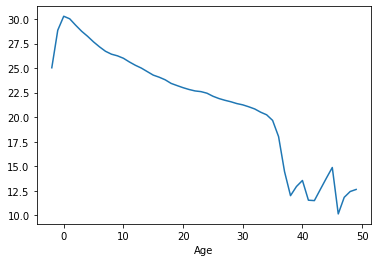

In [52]:
aggregated.groupby(['Age'])['AvgTemperature'].mean().plot()

In [53]:
aggregated.groupby(['Age'])['AvgTemperature'].mean().tail(20)

Age
30    21.255006
31    21.058974
32    20.838097
33    20.507156
34    20.242946
35    19.672743
36    18.022074
37    14.457456
38    12.011982
39    12.946426
40    13.558245
41    11.550499
42    11.508326
43    12.651053
44    13.783361
45    14.878472
46    10.153472
47    11.842361
48    12.434722
49    12.645000
Name: AvgTemperature, dtype: float64

In [ ]:
# 删除37天以后的数据
# aggregated=aggregated[(aggregated['Age']<=36) ]

In [54]:
aggregated.to_csv('C:\\FILES_202305\\202504养鸡项目\\chickenfarming\\data\\data_cleaned\\HumTem_data_agg.csv',index=False)